In [18]:
import scipy.io as scio
import h5py
import tifffile as tf
from PIL import Image

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import networkx as nx
from networkx.algorithms import community
import powerlaw
import chart_studio.plotly as py
from plotly.offline import iplot,plot
import plotly.graph_objs as go

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import entropy
from scipy.stats import ks_2samp
from scipy.stats import kruskal
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import wilcoxon
from itertools import chain
import copy
from scipy.stats import mannwhitneyu
import random
from statsmodels.stats.multitest import multipletests
from scipy.stats import friedmanchisquare

# Settings and Parameters

In [36]:
region_name_dict = {'MBPED':64, 'MBVL':65, 'MBML':66, 'LH':55, 'SLP':72, 'SIP':73, 'CRE':63, 'SCL':84, 'ICL':59,
                 'EB':23, 'FB':26, 'VES':60, 'EPA':85, 'PVLP':76, 'AOTU':79, 'FLA':67, 'IVLP':77}
region_name_dict_reverse = {64: 'MBPED',65: 'MBVL',66: 'MBML',55: 'LH',72: 'SLP',73: 'SIP',74: 'SMP',63: 'CRE',84: 'SCL',59: 'ICL',
                4: 'NO',23: 'EB',26: 'FB',56: 'LAL',79: 'AOTU',75: 'AVLP',76: 'PVLP',77: 'IVLP',60: 'VES',80: 'GOR',82: 'SPS',
                85: 'EPA',67: 'FLA'}

focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
region_names = [region_name_dict_reverse[i] for i in focus_regions_0]
print("region_names:", region_names)

## settings
data_index_list_0 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                   '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
data_index_list_65 = ['20230420-fly2', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                   '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
data_index_list_73 = ['20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', 
                      '20230510-fly1','20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
data_index_list_84 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230507-fly1',
                      '20230428-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
data_index_list_55 = ['20230417-fly2', '20230420-fly2', '20230420-fly3',  '20230428-fly1',
                      '20230510-fly1','20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']

## path
path_local ="xxxx/data_analysis_res_revision/motion_res/"
path_inspur = "xxxx/olfactory_representation/"
path_source = "xxxx/olfactory_representation/data/"
print("path_local:", path_local)
print("path_inspur:", path_inspur)
print("path_source:", path_source)

region_names: ['MBPED', 'MBVL', 'MBML', 'LH', 'SLP', 'SIP', 'SMP', 'CRE', 'SCL', 'ICL', 'NO', 'EB', 'FB', 'LAL', 'AOTU', 'AVLP', 'PVLP', 'IVLP', 'VES', 'GOR', 'SPS', 'EPA', 'FLA']
path_local: xxxx/data_analysis_res_revision/motion_res/
path_inspur: xxxx/olfactory_representation/
path_source: xxxx/olfactory_representation/data/


# Figure S5-h

============ data_index 20230417-fly2 ===========
region_records_avg: (23, 807) region_records_whole: (807,)


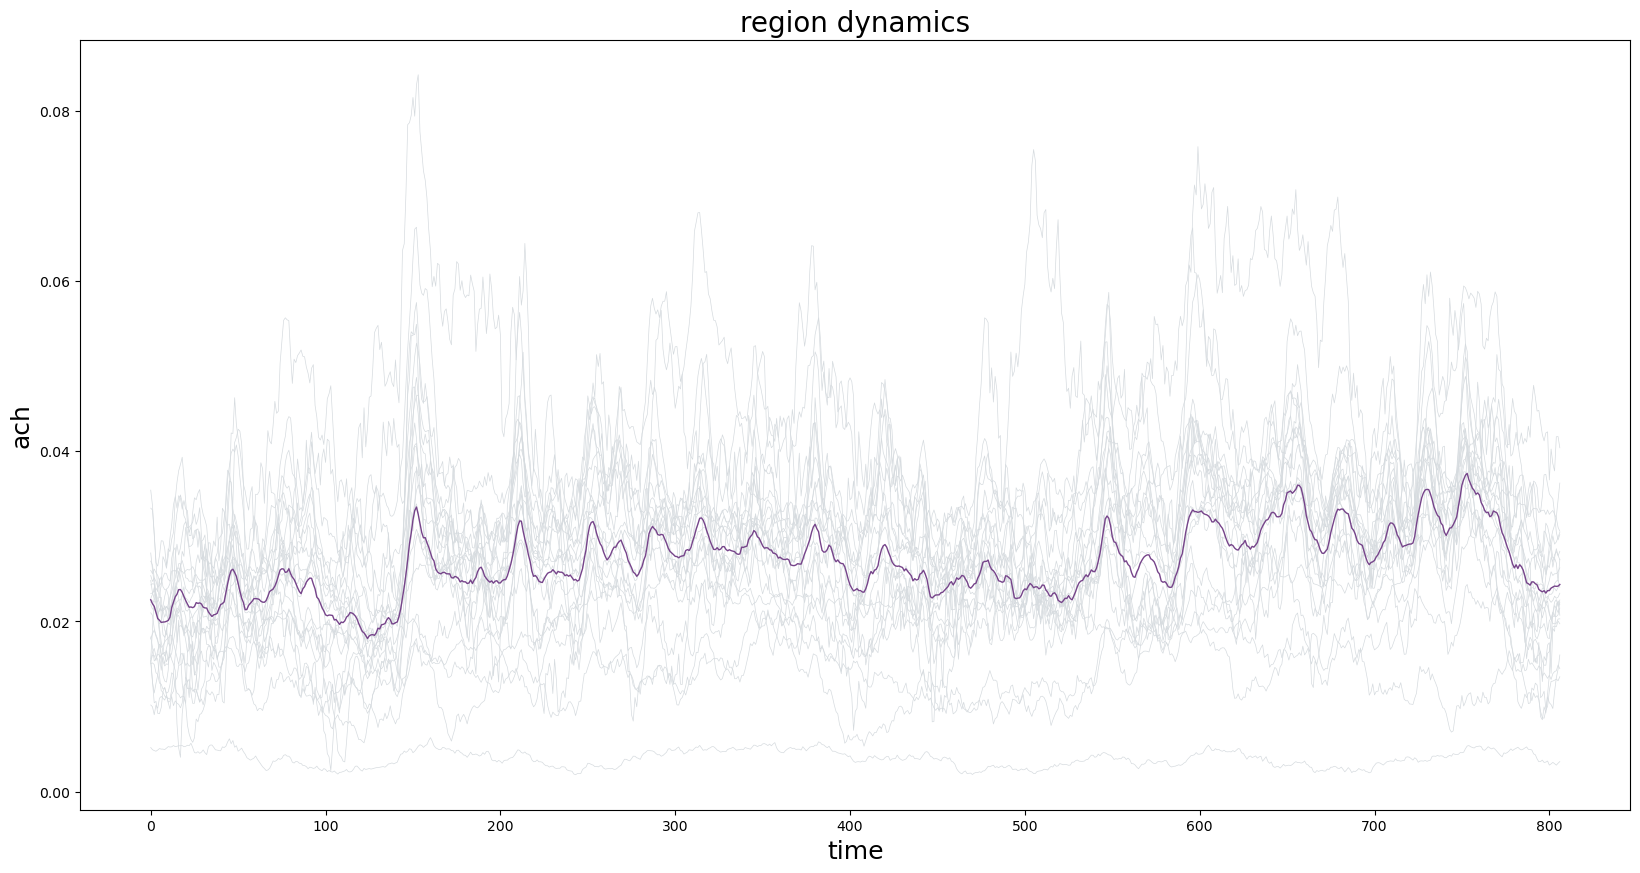

region_records_avg: (23, 807) region_records_whole: (807,)


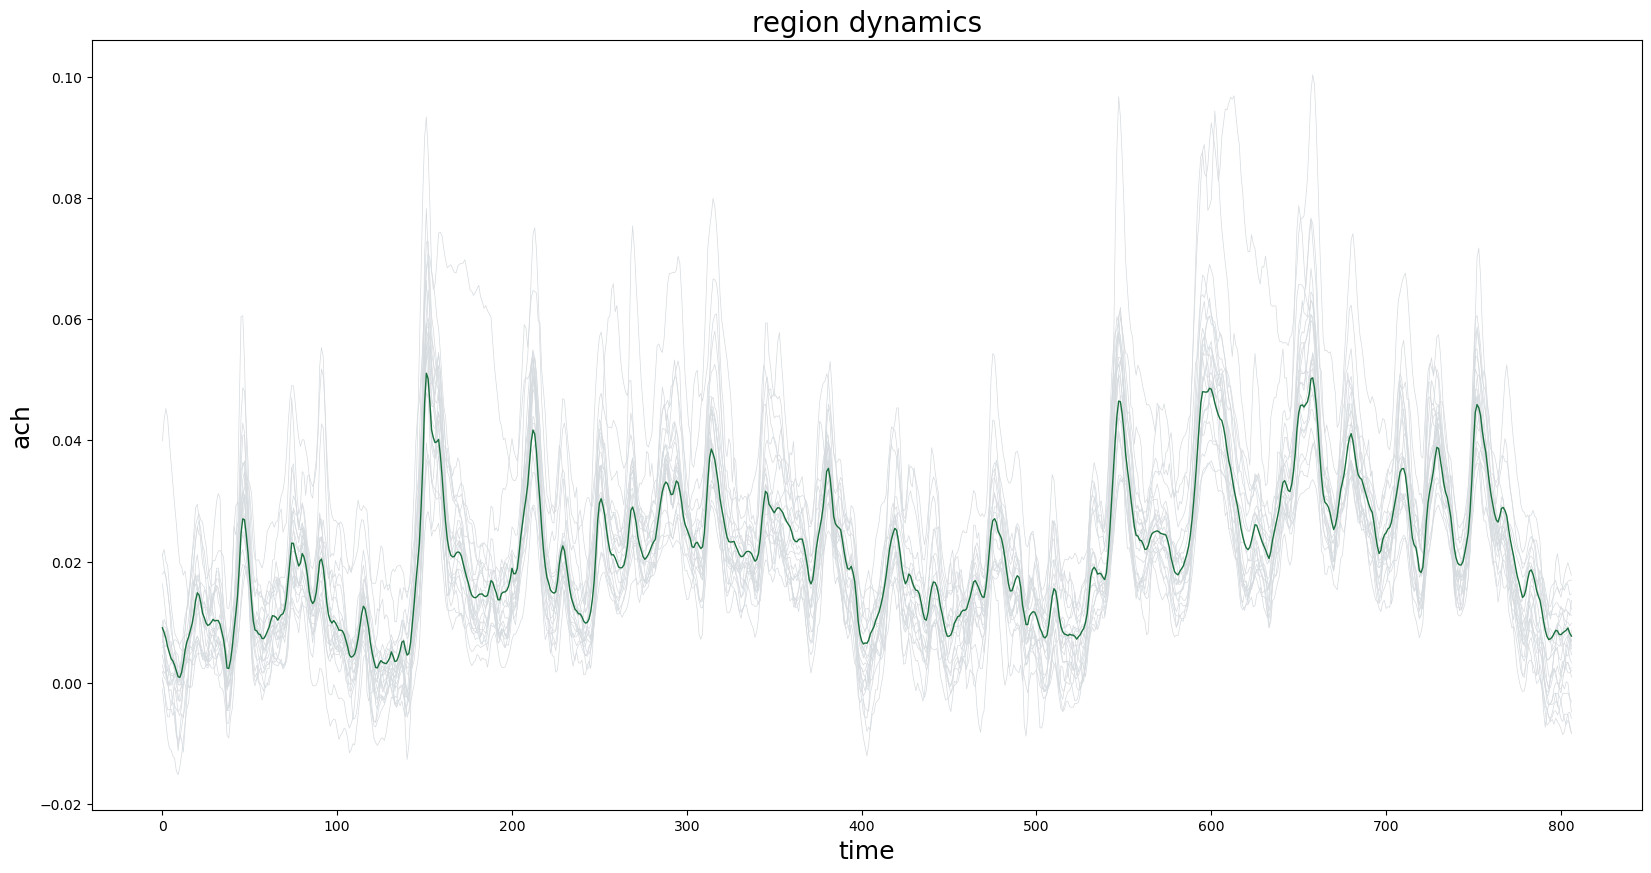

In [15]:
''' plot ACh and G7f traces '''

name  = "ach"

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', 
                   '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']

for data_index in data_index_list[:1]: 
    print('============ data_index ' + data_index + ' ===========')
    
    region_records_avg = np.load(path_inspur + "motion_res/region_avg_dynamic_trace_" + data_index + ".npy")
    region_records_whole = np.load(path_inspur + "motion_res/whole_brain_avg_dynamic_trace_" + data_index + ".npy")
    print("region_records_avg:", region_records_avg.shape, "region_records_whole:", region_records_whole.shape)
    figure = plt.figure(figsize=(20,10)) 
    for cnt in range(len(region_records_avg)):
        records_avg = region_records_avg[cnt]
#         records_avg = [i + 0.01 * cnt for i in region_records_avg[cnt]]
        plt.plot(records_avg, linewidth = 0.5, color = "#d6dbdf")
    plt.plot(region_records_whole, linewidth = 1, color = "#76448a")
    plt.title("region dynamics", fontsize = 20)
    plt.xlabel("time", fontsize = 18)
    plt.ylabel(name, fontsize = 18)
    plt.savefig(path_local + "motion_res/" + name +"_region_whole_dynamic_trace_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_res/" + name +"_region_whole_dynamic_trace_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()
    
    region_records_avg = np.load(path_inspur + "motion_res/region_avg_dynamic_trace_g7f_" + data_index + ".npy")
    region_records_whole = np.load(path_inspur + "motion_res/whole_brain_avg_dynamic_trace_g7f_" + data_index + ".npy")
    print("region_records_avg:", region_records_avg.shape, "region_records_whole:", region_records_whole.shape)
    figure = plt.figure(figsize=(20,10)) 
    for cnt in range(len(region_records_avg)):
        records_avg = region_records_avg[cnt]
#         records_avg = [i + 0.01 * cnt for i in region_records_avg[cnt]]
        plt.plot(records_avg, linewidth = 0.5, color = "#d6dbdf")
    plt.plot(region_records_whole, linewidth = 1, color = "#196f3d")
    plt.title("region dynamics", fontsize = 20)
    plt.xlabel("time", fontsize = 18)
    plt.ylabel(name, fontsize = 18)
    plt.savefig(path_local + "motion_res/g7f_" + name +"_region_whole_dynamic_trace_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_res/g7f_" + name +"_region_whole_dynamic_trace_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()
    


============ data_index 20230429-r5HT1.0-fly1 ===========
region_records_avg: (22, 404) region_records_whole: (404,)


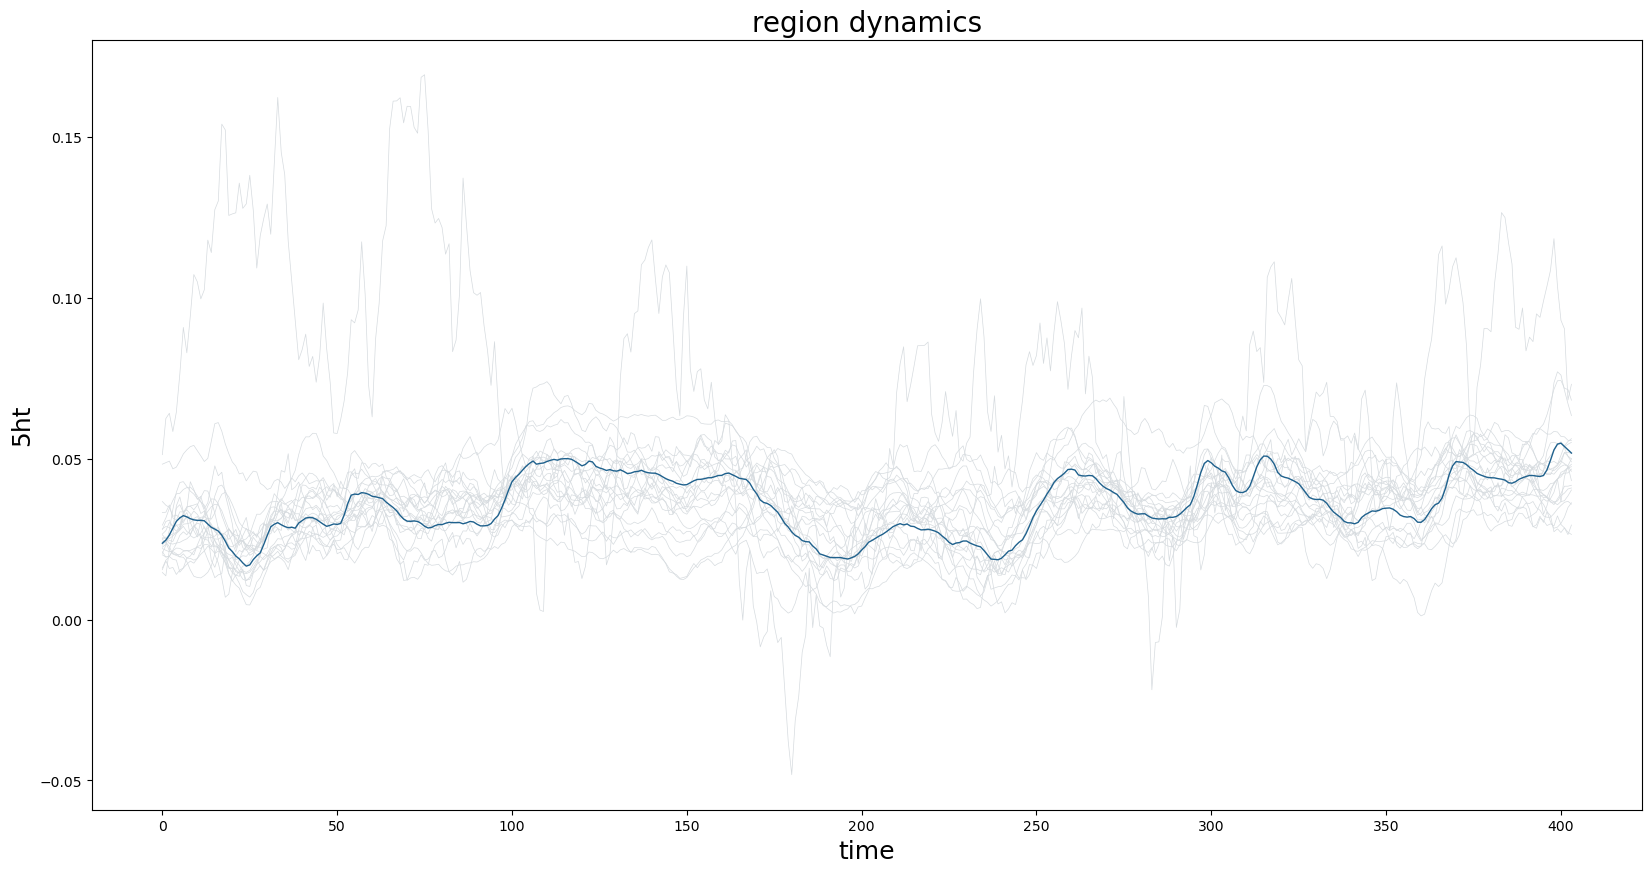

region_records_avg: (22, 404) region_records_whole: (404,)


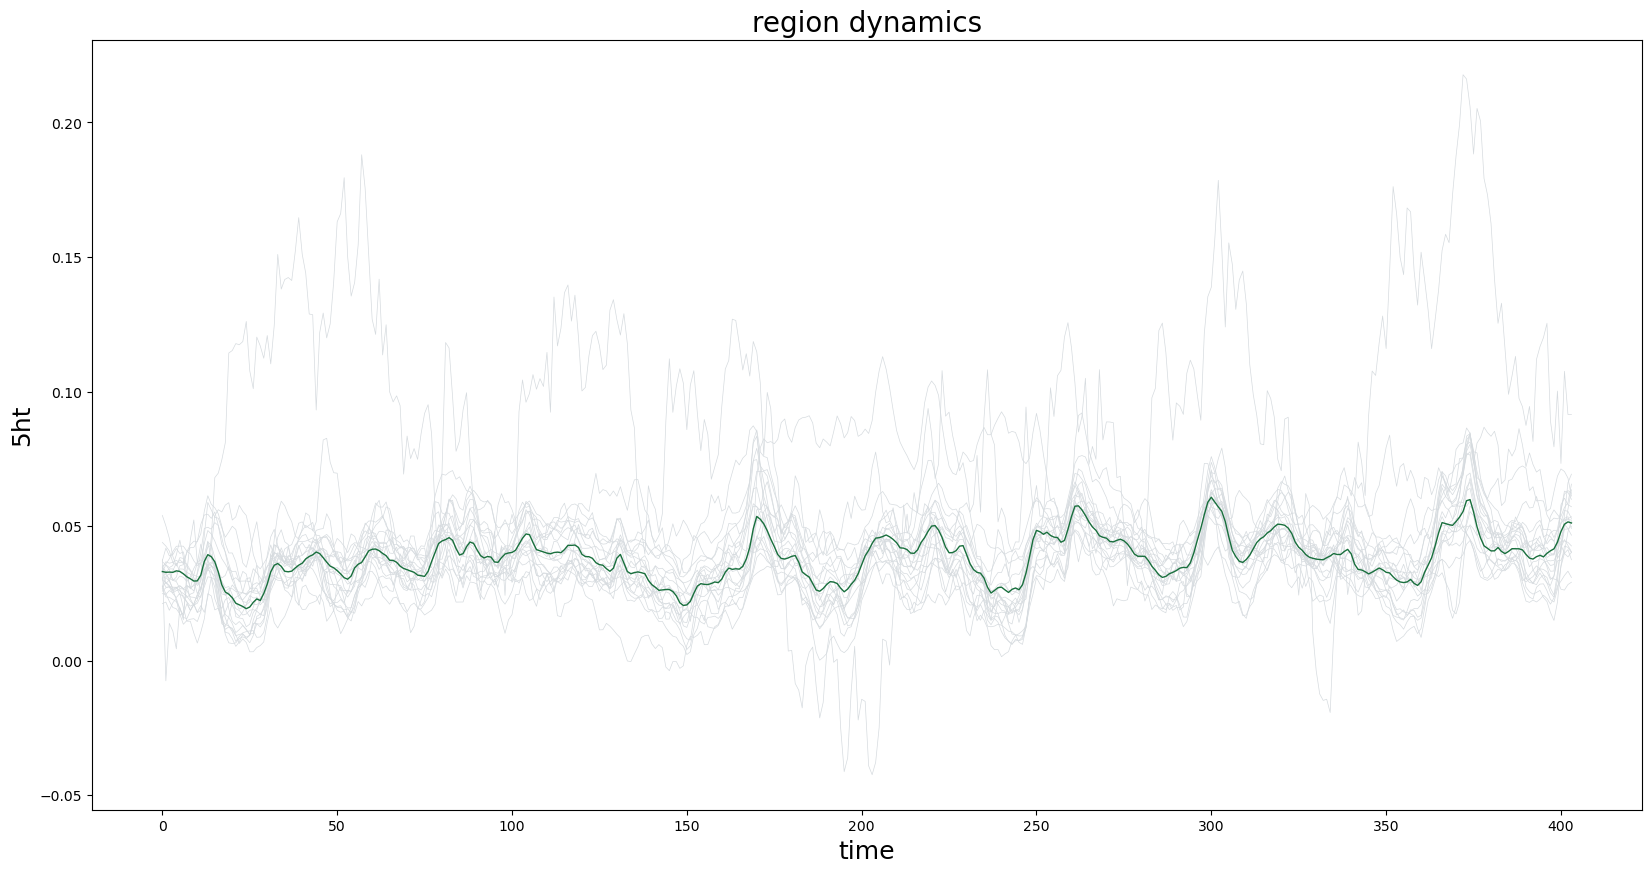

In [16]:
''' plot 5HT and G7f traces '''

name  = "5ht"

data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                    '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                    '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

for data_index in data_index_list[:1]: 
    print('============ data_index ' + data_index + ' ===========')
    
    region_records_avg = np.load(path_inspur + "motion_res/region_avg_dynamic_trace_" + data_index + ".npy")
    region_records_whole = np.load(path_inspur + "motion_res/whole_brain_avg_dynamic_trace_" + data_index + ".npy")
    print("region_records_avg:", region_records_avg.shape, "region_records_whole:", region_records_whole.shape)
    figure = plt.figure(figsize=(20,10)) 
    for cnt in range(len(region_records_avg)):
        records_avg = region_records_avg[cnt]
#         records_avg = [i + 0.01 * cnt for i in region_records_avg[cnt]]
        plt.plot(records_avg, linewidth = 0.5, color = "#d6dbdf")
    plt.plot(region_records_whole, linewidth = 1, color = "#1f618d")
    plt.title("region dynamics", fontsize = 20)
    plt.xlabel("time", fontsize = 18)
    plt.ylabel(name, fontsize = 18)
    plt.savefig(path_local + "motion_res/" + name +"_region_whole_dynamic_trace_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_res/" + name +"_region_whole_dynamic_trace_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()
    
    region_records_avg = np.load(path_inspur + "motion_res/region_avg_dynamic_trace_g7f_" + data_index + ".npy")
    region_records_whole = np.load(path_inspur + "motion_res/whole_brain_avg_dynamic_trace_g7f_" + data_index + ".npy")
    print("region_records_avg:", region_records_avg.shape, "region_records_whole:", region_records_whole.shape)
    figure = plt.figure(figsize=(20,10)) 
    for cnt in range(len(region_records_avg)):
        records_avg = region_records_avg[cnt]
#         records_avg = [i + 0.01 * cnt for i in region_records_avg[cnt]]
        plt.plot(records_avg, linewidth = 0.5, color = "#d6dbdf")
    plt.plot(region_records_whole, linewidth = 1, color = "#196f3d")
    plt.title("region dynamics", fontsize = 20)
    plt.xlabel("time", fontsize = 18)
    plt.ylabel(name, fontsize = 18)
    plt.savefig(path_local + "motion_res/g7f_" + name +"_region_whole_dynamic_trace_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_res/g7f_" + name +"_region_whole_dynamic_trace_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()
    


============ data_index 20230417-fly2 ===========
motion_strength_down: 807


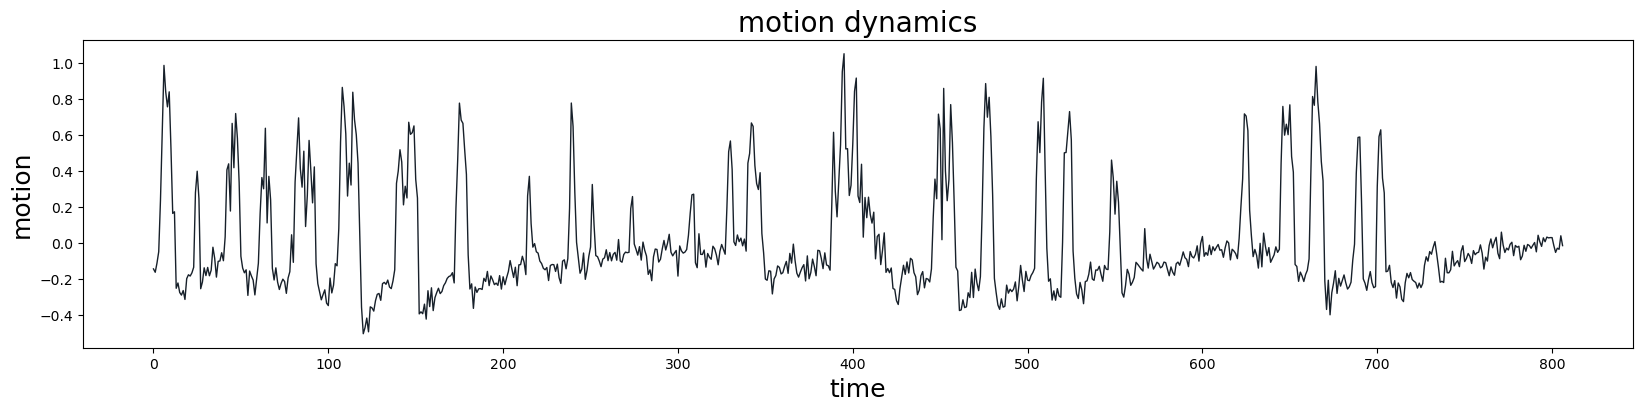

============ data_index 20230429-r5HT1.0-fly1 ===========
motion_strength_down: 404


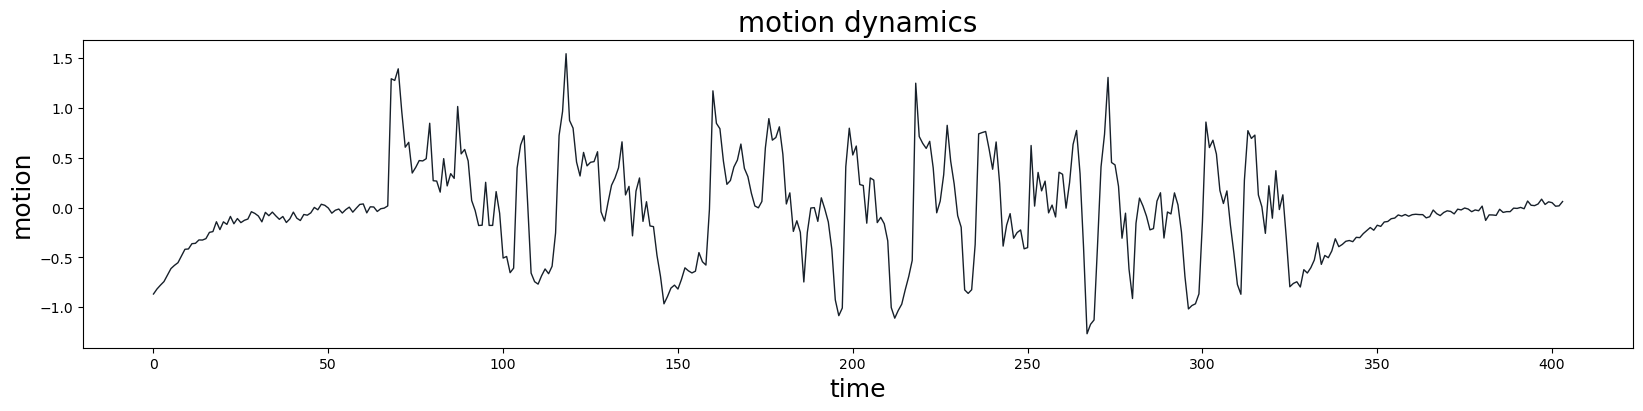

In [17]:
''' plot motion traces '''

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', 
                   '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
for data_index in data_index_list[:1]: 
    print('============ data_index ' + data_index + ' ===========')
    motion_strength_down = np.load(path_inspur + "motion_res/motion_strength_down_807_" + data_index + ".npy")
    print("motion_strength_down:", len(motion_strength_down))    
    figure = plt.figure(figsize=(20,4)) 
    plt.plot(motion_strength_down, linewidth = 1, color = "#17202a")
    plt.title("motion dynamics", fontsize = 20)
    plt.xlabel("time", fontsize = 18)
    plt.ylabel("motion", fontsize = 18)
    plt.savefig(path_local + "motion_res/motion_strength_down_807_" + data_index + ".pdf", bbox_inches='tight')
    plt.savefig(path_local + "motion_res/motion_strength_down_807_" + data_index + ".png", bbox_inches='tight')
    plt.show()
    
    
data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                    '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                    '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
for data_index in data_index_list[:1]: 
    print('============ data_index ' + data_index + ' ===========')       
    motion_strength_down = np.load(path_inspur + "motion_res/motion_strength_down_404_" + data_index + ".npy")
    print("motion_strength_down:", len(motion_strength_down))    
    figure = plt.figure(figsize=(20,4)) 
    plt.plot(motion_strength_down, linewidth = 1, color = "#17202a")
    plt.title("motion dynamics", fontsize = 20)
    plt.xlabel("time", fontsize = 18)
    plt.ylabel("motion", fontsize = 18)
    plt.savefig(path_local + "motion_res/motion_strength_down_404_" + data_index + ".pdf", bbox_inches='tight')
    plt.savefig(path_local + "motion_res/motion_strength_down_404_" + data_index + ".png", bbox_inches='tight')
    plt.show()
        
    

# Figure S5-i

delay_list: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
============ data_index 20230510-fly2 ===========
focus_regions: 23 [64, 65, 66, 55, 72]
regions_corr, regions_p, region_cnt: (73916, 21) (73916, 21) 23 [ 911 1478 3166  371 6634]
region_cnt_cum: 23 [911, 2389, 5555, 5926, 12560]
data_all_fla: (73916, 21)


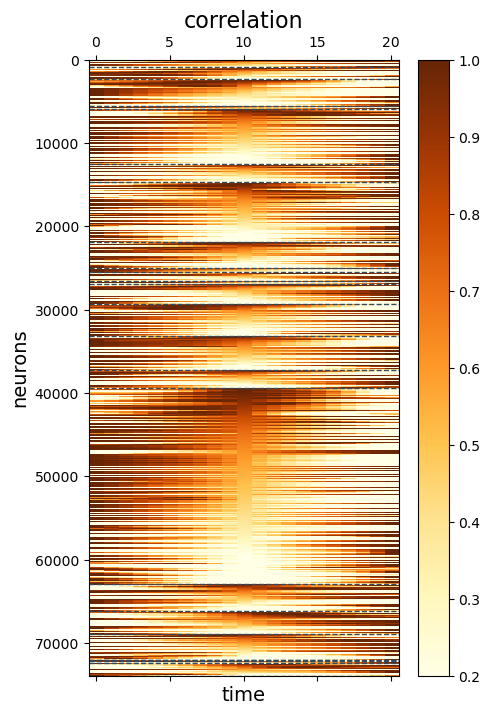

In [5]:
''' plot motion-ACh correlation '''

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # all brain regions
focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # brain regions except 80,82,
focus_regions_2 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # brain regions except 55,80,82,

path_inspur_motion = path_inspur + "motion_res/corr/"

name = "ach"
delay_list = list(np.arange(-20,22,2))
print("delay_list:", delay_list)

data_all = {}
for i in focus_regions_0:
    data_all[i] = []

for data_index in data_index_list[6:7]: 
    print('============ data_index ' + data_index + ' ===========')
    
    focus_regions = []
    if data_index in ['20230428-fly1', '20230510-fly1']:
        focus_regions = focus_regions_1
    elif data_index == '20230507-fly1':
        focus_regions = focus_regions_2
    else:
        focus_regions = focus_regions_0
    print("focus_regions:", len(focus_regions), focus_regions[:5])

    regions_corr = np.load(path_inspur_motion + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".npy")
    regions_p = np.load(path_inspur_motion + "motion_calc_corr_delay_p_" + name + "_" + data_index + ".npy")
    region_cnt = np.load(path_inspur_motion + "motion_calc_corr_delay_neuron_cnt_" + name + "_" + data_index + ".npy")
    print("regions_corr, regions_p, region_cnt:",np.array(regions_corr).shape, np.array(regions_p).shape, len(region_cnt), region_cnt[:5])
    regions_corr = np.nan_to_num(regions_corr)
    
    region_cnt_cum = []
    base = 0
    for i in region_cnt[:len(region_cnt)]:
        base += i
        region_cnt_cum.append(base)
    print("region_cnt_cum:", len(region_cnt_cum), region_cnt_cum[:5])
    
    base = 0
    regions_corr_dict = {}
    for i in range(len(focus_regions)):
        idx = focus_regions[i]
        nor_rec = [normalization(j) for j in regions_corr[base : region_cnt_cum[i]]]
        data_all[idx].extend(nor_rec)
        regions_corr_dict[idx] = nor_rec
        base = region_cnt_cum[i]
    
    '''sort'''
    data_all_fla = []
    data_all_fla_cnt = []
    base = 0
    for i in focus_regions:
        idx_neurons = []
        for j in regions_corr_dict[i]:
            j_avg = [1 - np.mean(j[k : k + 1]) for k in range(len(j))]
            idx_neurons.append(j_avg)
        idx_neurons = np.array(idx_neurons).T
        idx_neurons_sort = (idx_neurons[0], idx_neurons[1],idx_neurons[2], idx_neurons[3],idx_neurons[4], idx_neurons[5], \
                        idx_neurons[6], idx_neurons[7],idx_neurons[8], idx_neurons[9],idx_neurons[10])
        sort_idx = np.lexsort(idx_neurons_sort)
        rec_sorted = np.array(regions_corr_dict[i])[sort_idx]
        data_all_fla.extend(rec_sorted)
        base += len(regions_corr_dict[i])
        data_all_fla_cnt.append(base)
    print("data_all_fla:", np.array(data_all_fla).shape)

    figure = plt.figure(figsize=(5,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(data_all_fla, interpolation ='nearest', cmap = "YlOrBr", aspect = 'auto', vmin = 0.2, vmax = 1)
    for i in data_all_fla_cnt:
        plt.axhline(i, color = "#34495e", linewidth = 1, linestyle = "--")
    plt.title("correlation", fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    plt.ylabel("neurons", fontsize = 14)
    figure.colorbar(caxes) 
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()


delay_list: [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
============ data_index 20230510-fly2 ===========
focus_regions: 23 [64, 65, 66, 55, 72]
regions_corr, regions_p, region_cnt: (73916, 21) (73916, 21) 23 [ 911 1478 3166  371 6634]
region_cnt_cum: 23 [911, 2389, 5555, 5926, 12560]
data_all_fla: (73916, 21)


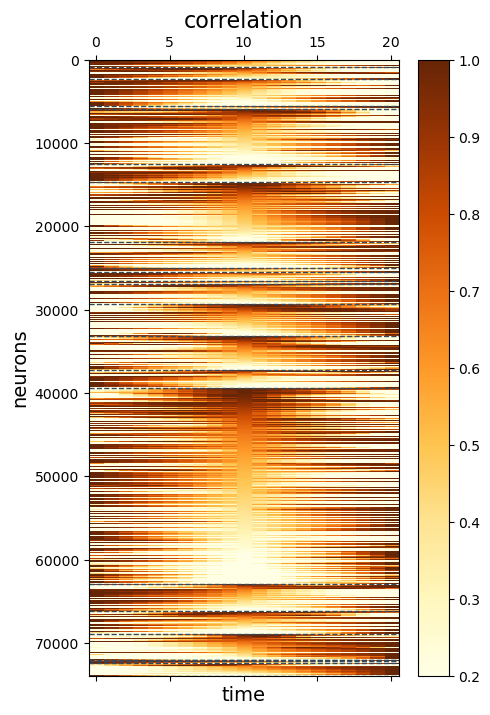

In [12]:
''' plot motion-G7f correlation of ACh flies '''

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', 
                   '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # all brain regions
focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # brain regions except 80,82,
focus_regions_2 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # brain regions except 55,80,82,

path_inspur_motion = path_inspur + "motion_res/corr/"

name = "g7f-ach"
delay_list = list(np.arange(-6,10,1))
print("delay_list:", delay_list)

data_all = {}
for i in focus_regions_0:
    data_all[i] = []

for data_index in data_index_list[6:7]: 
    print('============ data_index ' + data_index + ' ===========')
    
    focus_regions = []
    if data_index in ['20230428-fly1', '20230510-fly1']:
        focus_regions = focus_regions_1
    elif data_index == '20230507-fly1':
        focus_regions = focus_regions_2
    else:
        focus_regions = focus_regions_0
    print("focus_regions:", len(focus_regions), focus_regions[:5])

    regions_corr = np.load(path_inspur_motion + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".npy")
    regions_p = np.load(path_inspur_motion + "motion_calc_corr_delay_p_" + name + "_" + data_index + ".npy")
    region_cnt = np.load(path_inspur_motion + "motion_calc_corr_delay_neuron_cnt_" + name + "_" + data_index + ".npy")
    print("regions_corr, regions_p, region_cnt:",np.array(regions_corr).shape, np.array(regions_p).shape, len(region_cnt), region_cnt[:5])
    regions_corr = np.nan_to_num(regions_corr)
    
    region_cnt_cum = []
    base = 0
    for i in region_cnt[:len(region_cnt)]:
        base += i
        region_cnt_cum.append(base)
    print("region_cnt_cum:", len(region_cnt_cum), region_cnt_cum[:5])
    
    base = 0
    regions_corr_dict = {}
    for i in range(len(focus_regions)):
        idx = focus_regions[i]
        nor_rec = [normalization(j) for j in regions_corr[base : region_cnt_cum[i]]]
        data_all[idx].extend(nor_rec)
        regions_corr_dict[idx] = nor_rec
        base = region_cnt_cum[i]
    
    '''sort'''
    data_all_fla = []
    data_all_fla_cnt = []
    base = 0
    for i in focus_regions:
        idx_neurons = []
        for j in regions_corr_dict[i]:
            j_avg = [1 - np.mean(j[k : k + 1]) for k in range(len(j))]
            idx_neurons.append(j_avg)
        idx_neurons = np.array(idx_neurons).T
        idx_neurons_sort = (idx_neurons[0], idx_neurons[1],idx_neurons[2], idx_neurons[3],idx_neurons[4], idx_neurons[5], \
                        idx_neurons[6], idx_neurons[7],idx_neurons[8], idx_neurons[9],idx_neurons[10])
        sort_idx = np.lexsort(idx_neurons_sort)
        rec_sorted = np.array(regions_corr_dict[i])[sort_idx]
        data_all_fla.extend(rec_sorted)
        base += len(regions_corr_dict[i])
        data_all_fla_cnt.append(base)
    print("data_all_fla:", np.array(data_all_fla).shape)

    figure = plt.figure(figsize=(5,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(data_all_fla, interpolation ='nearest', cmap = "YlOrBr", aspect = 'auto', vmin = 0.2, vmax = 1)
    for i in data_all_fla_cnt:
        plt.axhline(i, color = "#34495e", linewidth = 1, linestyle = "--")
    plt.title("correlation", fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    plt.ylabel("neurons", fontsize = 14)
    figure.colorbar(caxes) 
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()


delay_list: [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
============ data_index 20230603-r5HT1.0-fly1 ===========
focus_regions: 23 [64, 65, 66, 55, 72]
regions_corr, regions_p, region_cnt: (90649, 21) (90649, 21) 23 [1123 1784 3863 1401 9631]
region_cnt_cum: 23 [1123, 2907, 6770, 8171, 17802]
data_all_fla: (90649, 21)


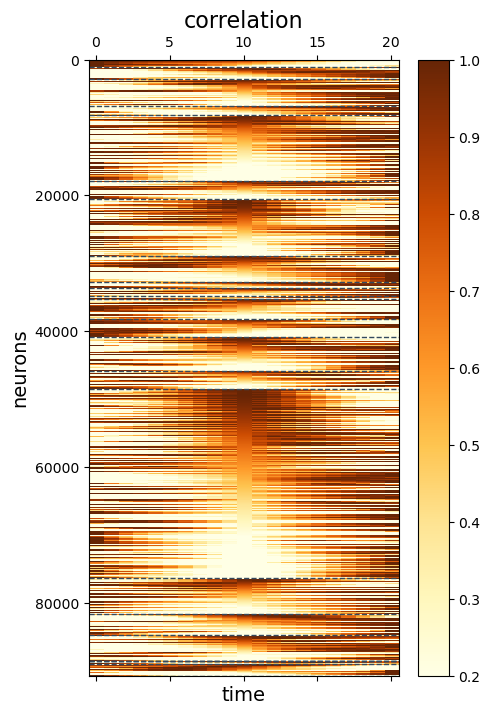

In [13]:
''' plot motion-5Ht correlation '''

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                    '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                    '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,85,67] # 82
focus_regions_2 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 80,82
focus_regions_3 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # 55

path_inspur_motion = path_inspur + "motion_res/corr/"

name = "5ht"
delay_list = list(np.arange(-6,10,1))
print("delay_list:", delay_list)

data_all = {}
for i in focus_regions_0:
    data_all[i] = []

for data_index in data_index_list[9:]: 
    print('============ data_index ' + data_index + ' ===========')
    
    focus_regions = []
    if data_index in ["20230429-r5HT1.0-fly1", "20230516-r5HT1.0-fly4"]:
        focus_regions = focus_regions_1
    elif data_index in ["20230601-r5HT1.0-fly3", "20230517-r5HT1.0-fly1"]:
        focus_regions = focus_regions_2
    elif data_index == "20230601-r5HT1.0-fly1":
        focus_regions = focus_regions_3
    else:
        focus_regions = focus_regions_0
    print("focus_regions:", len(focus_regions), focus_regions[:5])

    regions_corr = np.load(path_inspur_motion + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".npy")
    regions_p = np.load(path_inspur_motion + "motion_calc_corr_delay_p_" + name + "_" + data_index + ".npy")
    region_cnt = np.load(path_inspur_motion + "motion_calc_corr_delay_neuron_cnt_" + name + "_" + data_index + ".npy")
    print("regions_corr, regions_p, region_cnt:",np.array(regions_corr).shape, np.array(regions_p).shape, len(region_cnt), region_cnt[:5])
    regions_corr = np.nan_to_num(regions_corr)
    
    region_cnt_cum = []
    base = 0
    for i in region_cnt[:len(region_cnt)]:
        base += i
        region_cnt_cum.append(base)
    print("region_cnt_cum:", len(region_cnt_cum), region_cnt_cum[:5])
    
    base = 0
    regions_corr_dict = {}
    for i in range(len(focus_regions)):
        idx = focus_regions[i]
        nor_rec = [normalization(j) for j in regions_corr[base : region_cnt_cum[i]]]
        data_all[idx].extend(nor_rec)
        regions_corr_dict[idx] = nor_rec
        base = region_cnt_cum[i]

    '''sort'''
    data_all_fla = []
    data_all_fla_cnt = []
    base = 0
    for i in focus_regions:
        idx_neurons = []
        for j in regions_corr_dict[i]:
            j_avg = [1 - np.mean(j[k : k + 1]) for k in range(len(j))]
            idx_neurons.append(j_avg)
        idx_neurons = np.array(idx_neurons).T
        idx_neurons_sort = (idx_neurons[0], idx_neurons[1],idx_neurons[2], idx_neurons[3],idx_neurons[4], idx_neurons[5], \
                        idx_neurons[6], idx_neurons[7],idx_neurons[8], idx_neurons[9],idx_neurons[10])
        sort_idx = np.lexsort(idx_neurons_sort)
        rec_sorted = np.array(regions_corr_dict[i])[sort_idx]
        data_all_fla.extend(rec_sorted)
        base += len(regions_corr_dict[i])
        data_all_fla_cnt.append(base)
    print("data_all_fla:", np.array(data_all_fla).shape)

    figure = plt.figure(figsize=(5,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(data_all_fla, interpolation ='nearest', cmap = "YlOrBr", aspect = 'auto', vmin = 0.2, vmax = 1)
    for i in data_all_fla_cnt:
        plt.axhline(i, color = "#34495e", linewidth = 1, linestyle = "--")
    plt.title("correlation", fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    plt.ylabel("neurons", fontsize = 14)
    figure.colorbar(caxes) 
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()


delay_list: [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
============ data_index 20230603-r5HT1.0-fly1 ===========
focus_regions: 23 [64, 65, 66, 55, 72]
regions_corr, regions_p, region_cnt: (90649, 21) (90649, 21) 23 [1123 1784 3863 1401 9631]
region_cnt_cum: 23 [1123, 2907, 6770, 8171, 17802]
data_all_fla: (90649, 21)


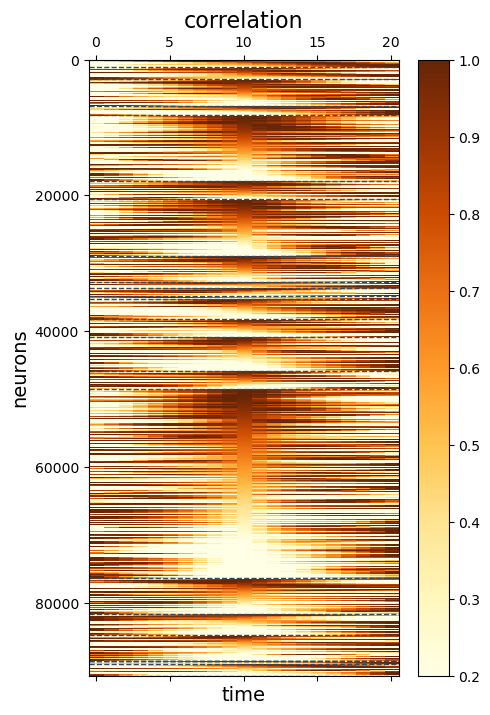

In [14]:
''' plot motion-G7f correlation of 5HT flies '''

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                    '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                    '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,85,67] # 82
focus_regions_2 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 80,82
focus_regions_3 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # 55

path_inspur_motion = path_inspur + "motion_res/corr/"

name = "g7f-5ht"
delay_list = list(np.arange(-6,10,1))
print("delay_list:", delay_list)

data_all = {}
for i in focus_regions_0:
    data_all[i] = []

for data_index in data_index_list[9:]: 
    print('============ data_index ' + data_index + ' ===========')
    
    focus_regions = []
    if data_index in ["20230429-r5HT1.0-fly1", "20230516-r5HT1.0-fly4"]:
        focus_regions = focus_regions_1
    elif data_index in ["20230601-r5HT1.0-fly3", "20230517-r5HT1.0-fly1"]:
        focus_regions = focus_regions_2
    elif data_index == "20230601-r5HT1.0-fly1":
        focus_regions = focus_regions_3
    else:
        focus_regions = focus_regions_0
    print("focus_regions:", len(focus_regions), focus_regions[:5])

    regions_corr = np.load(path_inspur_motion + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".npy")
    regions_p = np.load(path_inspur_motion + "motion_calc_corr_delay_p_" + name + "_" + data_index + ".npy")
    region_cnt = np.load(path_inspur_motion + "motion_calc_corr_delay_neuron_cnt_" + name + "_" + data_index + ".npy")
    print("regions_corr, regions_p, region_cnt:",np.array(regions_corr).shape, np.array(regions_p).shape, len(region_cnt), region_cnt[:5])
    regions_corr = np.nan_to_num(regions_corr)
    
    region_cnt_cum = []
    base = 0
    for i in region_cnt[:len(region_cnt)]:
        base += i
        region_cnt_cum.append(base)
    print("region_cnt_cum:", len(region_cnt_cum), region_cnt_cum[:5])
    
    base = 0
    regions_corr_dict = {}
    for i in range(len(focus_regions)):
        idx = focus_regions[i]
        nor_rec = [normalization(j) for j in regions_corr[base : region_cnt_cum[i]]]
        data_all[idx].extend(nor_rec)
        regions_corr_dict[idx] = nor_rec
        base = region_cnt_cum[i]
    
    '''sort'''
    data_all_fla = []
    data_all_fla_cnt = []
    base = 0
    for i in focus_regions:
        idx_neurons = []
        for j in regions_corr_dict[i]:
            j_avg = [1 - np.mean(j[k : k + 1]) for k in range(len(j))]
            idx_neurons.append(j_avg)
        idx_neurons = np.array(idx_neurons).T
        idx_neurons_sort = (idx_neurons[0], idx_neurons[1],idx_neurons[2], idx_neurons[3],idx_neurons[4], idx_neurons[5], \
                        idx_neurons[6], idx_neurons[7],idx_neurons[8], idx_neurons[9],idx_neurons[10])
        sort_idx = np.lexsort(idx_neurons_sort)
        rec_sorted = np.array(regions_corr_dict[i])[sort_idx]
        data_all_fla.extend(rec_sorted)
        base += len(regions_corr_dict[i])
        data_all_fla_cnt.append(base)
    print("data_all_fla:", np.array(data_all_fla).shape)

    figure = plt.figure(figsize=(5,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(data_all_fla, interpolation ='nearest', cmap = "YlOrBr", aspect = 'auto', vmin = 0.2, vmax = 1)
    for i in data_all_fla_cnt:
        plt.axhline(i, color = "#34495e", linewidth = 1, linestyle = "--")
    plt.title("correlation", fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    plt.ylabel("neurons", fontsize = 14)
    figure.colorbar(caxes) 
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".png", bbox_inches='tight')
    plt.savefig(path_local + "motion_calc_corr_delay_r_" + name + "_" + data_index + ".pdf", bbox_inches='tight')
    plt.show()


# Figure S5-j

region_sort_names: 23 ['SCL', 'FLA', 'VES', 'NO', 'AOTU', 'SMP', 'MBML', 'ICL', 'CRE', 'MBPED', 'MBVL', 'SIP', 'LAL', 'FB', 'SLP', 'IVLP', 'AVLP', 'LH', 'PVLP', 'EPA', 'SPS', 'GOR', 'EB']


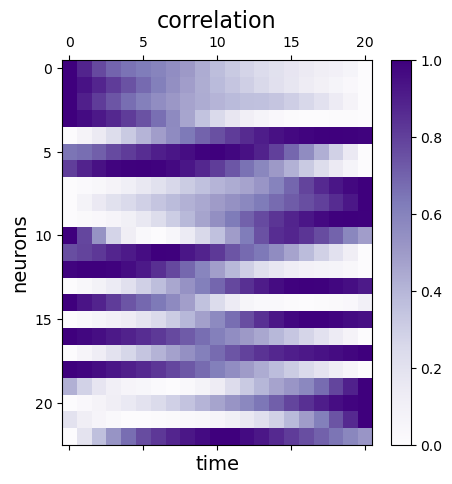

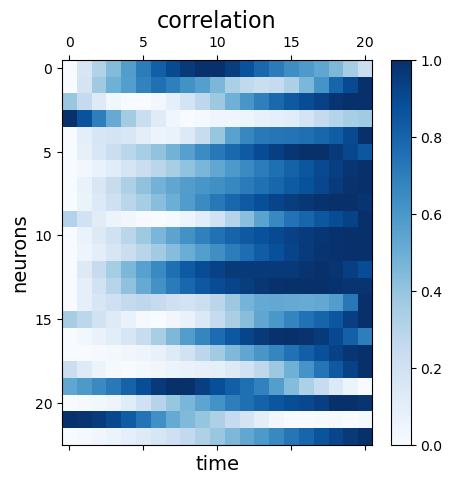

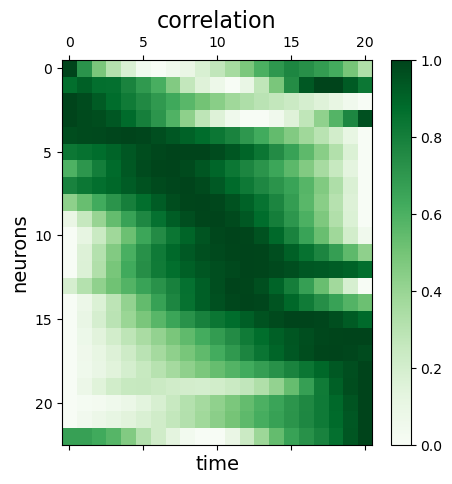

In [21]:
def normalization_given_minmax(data, vmin, vmax):
    _range = vmax - vmin
    return (data - vmin) / _range

names = ["ach", "5ht", "g7f"]
cmap_list = ["Purples", "Blues", "Greens"]
color_list = ["#76448a", "#1f618d", "#196f3d"]
yy = [math.sqrt(10), math.sqrt(10), math.sqrt(20)] #[10,10,20]#

focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # all brain regions
sort_idx_g7f =  [8,22,18,10,14,6,2,9,7,0,1,5,13,12,4,17,15,3,16,21,20,19,11]

region_sort_idx = [focus_regions_0[i] for i in sort_idx_g7f]
region_sort_names = [region_name_dict_reverse[i] for i in region_sort_idx]
print("region_sort_names:", len(region_sort_names), region_sort_names)

dist_all = []
ratio_avg_all, ratio_std_all, ratio_list_all = [], [], []
time_avg_all, time_std_all, time_list_all = [], [], []
region_avg_all, region_std_all, region_list_all = [], [], []

for name_idx in range(3):
    name = names[name_idx]
    
    corr_avg_regions_dict = np.load(path_local + "motion_calc_corr_delay_regions_" + name + "_all_flies_norm.npy", allow_pickle = True).item()
    corr_matrix_norm = [corr_avg_regions_dict[i] for i in focus_regions_0]
    
    corr_avg_regions_dict = np.load(path_local + "motion_calc_corr_delay_regions_" + name + "_all_flies.npy", allow_pickle = True).item()
    corr_matrix = [corr_avg_regions_dict[i] for i in focus_regions_0]
    
    corr_avg_all = np.load(path_local + "motion_calc_corr_delay_regions_avg_" + name + "_all_flies_norm.npy", allow_pickle = True).item()    
    avg_all = []
    for v in corr_avg_all.values():
        avg_all.extend(v)
    avg_all = np.array(avg_all)
    
    sort_idx = sort_idx_g7f
    corr_matrix_norm = np.array(corr_matrix_norm)[sort_idx] 
    corr_matrix = np.array(corr_matrix)[sort_idx] 
    
    # matrix
    figure = plt.figure(figsize=(5,5)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(corr_matrix_norm, interpolation ='nearest', cmap = cmap_list[name_idx], aspect = 'auto')#,vmin = -0.2, vmax = 0.2) 
    plt.title("correlation", fontsize = 16)
    plt.xlabel("time", fontsize = 14)
    plt.ylabel("neurons", fontsize = 14)
    figure.colorbar(caxes) 
    plt.savefig(path_local + "motion_calc_corr_region_" + name + "_all_flies.png", bbox_inches='tight')
    plt.savefig(path_local + "motion_calc_corr_region_" + name + "_all_flies.pdf", bbox_inches='tight')
    plt.show() 

    # dist
    dist_all.append(corr_matrix)
    
    # avg
    avg_list = np.mean(corr_matrix_norm, axis = 0)
    std_list = [i / yy[name_idx]  for i in np.std(corr_matrix_norm, axis = 0)]
    time_avg_all.append(avg_list)
    time_std_all.append(std_list)
    time_list_all.append(corr_matrix)
    
    # region avg
    avg_list = np.mean(corr_matrix, axis = 1)
    std_list = [i / yy[name_idx]  for i in np.std(corr_matrix, axis = 1)]
    region_avg_all.append(avg_list)
    region_std_all.append(std_list)
    region_list_all.append(corr_matrix.T)

    region_ratio_list = np.zeros(corr_matrix.shape)
    for i in range(len(corr_matrix)):
        avg = np.mean(corr_matrix[i])
        for j in range(len(corr_matrix[0])):
            region_ratio_list[i,j] = 1 if corr_matrix[i,j] > avg else 0
    corr_sum = np.sum(region_ratio_list, axis = 0)
    corr_sum = corr_sum / len(region_ratio_list)
    ratio_avg_all.append(corr_sum)
    corr_std = np.std(region_ratio_list, axis = 0)
    corr_std = [i/yy[name_idx] for i in corr_std]
    ratio_std_all.append(corr_std)  
    
    ratio_regions = []
    for v in corr_avg_all.values():
        region_mat = np.array(v)
        region_ratio_list = np.zeros(region_mat.shape)
        for i in range(len(region_mat)):
            avg = np.mean(region_mat[i])
            for j in range(len(region_mat[0])):
                region_ratio_list[i,j] = 1 if region_mat[i,j] > avg else 0
        corr_sum = np.sum(region_ratio_list, axis = 0)
        corr_sum = corr_sum / len(region_ratio_list)
        ratio_regions.append(corr_sum)
    ratio_list_all.append(ratio_regions) 
    
    



# Figure S5-k

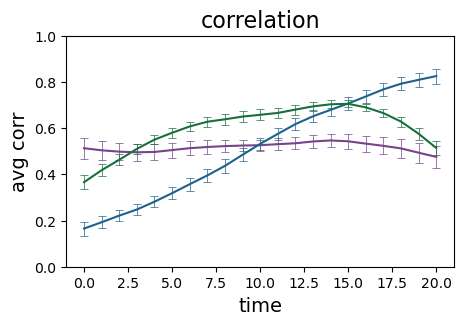

pvalues: [3.5223079589523706e-07, 3.4355042201686874e-07, 4.770437768323794e-07, 5.744445437935369e-07, 9.669729373179078e-07, 1.8188915446387061e-06, 3.5597234195204835e-06, 6.365121173377363e-06, 1.3319932142024854e-05, 2.5343538105917187e-05, 4.154701625792842e-05, 6.962027215732111e-05, 8.601829251980469e-05, 0.00013020924691177927, 0.0001595282995307163, 0.00023074829010113687, 0.00032522220864400925, 0.0004182086402052603, 0.0006057642259162642, 0.0007639626721686136, 0.0007806469776001273]


In [29]:
fig, ax = plt.subplots(figsize = (5,3), dpi= 100,facecolor="w")
name_idx = 0
for i in range(len(time_avg_all)):
    avg_list = time_avg_all[i]
    std_list = [j / math.sqrt(10) for j in time_std_all[i]]
    plt.errorbar(list(range(len(avg_list))), avg_list, yerr = std_list, fmt = '', ecolor = color_list[name_idx], 
                 elinewidth = 0.5, color = color_list[name_idx], capsize = 3, capthick = 0.5)
    plt.plot(range(len(avg_list)), avg_list, color = color_list[name_idx], linewidth = 0.5, alpha = 0.8)
    name_idx += 1
plt.title("correlation", fontsize = 16)
plt.xlabel("time", fontsize = 14)
plt.ylabel("avg corr", fontsize = 14)
plt.ylim(0,1)
plt.savefig(path_local + "motion_calc_corr_region_timeline_all_flies.png", bbox_inches='tight')
plt.savefig(path_local + "motion_calc_corr_region_timeline_all_flies.pdf", bbox_inches='tight')
plt.show()

## test
time_list_ach = np.array(time_list_all[0])
time_list_5ht = np.array(time_list_all[1])
time_list_g7f = np.array(time_list_all[2])
pvalues = []
for i in range(len(time_list_ach[0])):
    value, p = kruskal(time_list_ach[:,i], time_list_5ht[:,i], time_list_g7f[:,i])
    pvalues.append(p)
print("pvalues:", pvalues)


# Figure S5-l

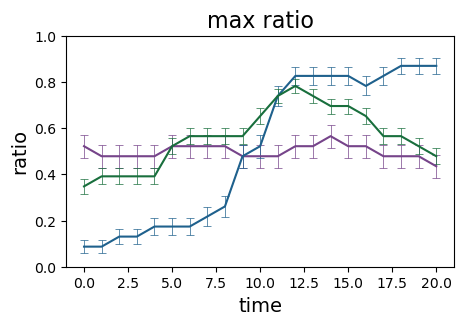

pvalues: [0.07501324764918794, 0.019622635115737388, 0.00916613987106249, 0.0122479281325646, 0.017172122118922627, 0.05170523284010668, 0.059694166557038596, 0.05632168148130941, 0.5867150759729357, 0.7760414068790555, 0.5287854878300944, 0.1061318744997898, 0.16157623582893524, 0.13306362321411572, 0.056525998577007665, 0.056828266830958506, 0.10616929240768337, 0.10336585700911366, 0.09458800978216678, 0.22009840039709938, 0.24935379404867344]


In [30]:
fig, ax = plt.subplots(figsize = (5,3), dpi= 100,facecolor="w")
name_idx = 0
for i in range(len(ratio_avg_all)):
    avg_list = ratio_avg_all[i]
    std_list = [j / math.sqrt(10) for j in ratio_std_all[i]]
    plt.errorbar(list(range(len(avg_list))), avg_list, yerr = std_list, fmt = '', ecolor = color_list[name_idx], 
                 elinewidth = 0.5, color = color_list[name_idx], capsize = 3, capthick = 0.5)
    plt.plot(range(len(avg_list)), avg_list, color = color_list[name_idx], linewidth = 0.5, alpha = 0.8)
    name_idx += 1
plt.title("max ratio", fontsize = 16)
plt.xlabel("time", fontsize = 14)
plt.ylabel("ratio", fontsize = 14)
plt.ylim(0,1)
plt.savefig(path_local + "motion_calc_corr_region_time_ratio_all_flies.png", bbox_inches='tight')
plt.savefig(path_local + "motion_calc_corr_region_time_ratio_all_flies.pdf", bbox_inches='tight')
plt.show()

## test
ratio_list_ach = np.array(ratio_list_all[0])
ratio_list_5ht = np.array(ratio_list_all[1])
ratio_list_g7f = np.array(ratio_list_all[2])
pvalues = []
for i in range(len(ratio_list_ach[0])):
    value, p = kruskal(ratio_list_ach[:,i], ratio_list_5ht[:,i], ratio_list_g7f[:,i])
    pvalues.append(p)
print("pvalues:", pvalues)

# Figure S5-m

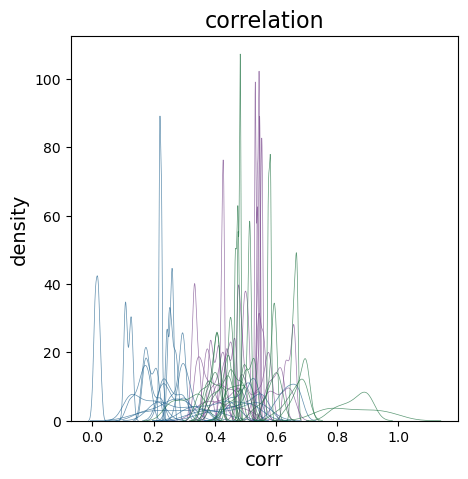

In [22]:
dist_all_fla = np.array(dist_all).flatten()
vmin, vmax = min(dist_all_fla), max(dist_all_fla)
figure = plt.figure(figsize=(5,5)) 
axes = figure.add_subplot(111) 
name_idx = 0
for corr_matrix in dist_all:
    for i in corr_matrix:
        i_norm = normalization_given_minmax(i, vmin, vmax)
        sns.kdeplot(i_norm, color = color_list[name_idx], linewidth = 0.5, alpha = 0.7)
    name_idx += 1
plt.title("correlation", fontsize = 16)
plt.xlabel("corr", fontsize = 14)
plt.ylabel("density", fontsize = 14)
plt.savefig(path_local + "motion_calc_corr_region_dist_all_flies.png", bbox_inches='tight')
plt.savefig(path_local + "motion_calc_corr_region_dist_all_flies.pdf", bbox_inches='tight')
plt.show()

# Figure S5-n

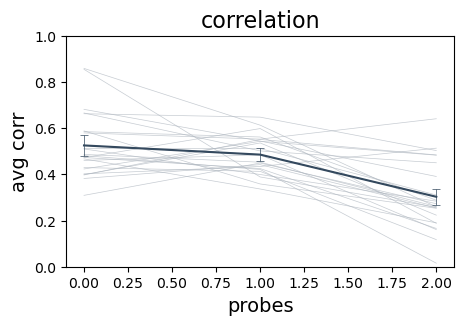

wilcoxon stat: 43837.0  p value: 1.945875798874681e-06
wilcoxon stat: 5660.0  p value: 2.7332955011369807e-66
wilcoxon stat: 3747.0  p value: 4.800580300822088e-71
multi-comparison corrections - pvalue: [6.48625266e-07 1.36664775e-66 4.80058030e-71]


In [24]:
avg_collect = []
for corr_matrix in dist_all:
    avg_probe = []
    for i in corr_matrix:
        i_norm = normalization_given_minmax(i, vmin, vmax)
        avg_probe.append(np.mean(i_norm))
    avg_collect.append(avg_probe) 
corr_matrix_list = []
for corr_matrix in dist_all:
    corr_matrix_fla = np.array(corr_matrix).flatten()
    i_norm = normalization_given_minmax(corr_matrix_fla, vmin, vmax)
    corr_matrix_list.append(i_norm)
corr_matrix_list = [corr_matrix_list[2], corr_matrix_list[0], corr_matrix_list[1]]
avg_list = [np.mean(i) for i in corr_matrix_list]
std_list = [np.std(corr_matrix_list[i]) / yy[i]  for i in range(len(corr_matrix_list))]

fig, ax = plt.subplots(figsize = (5,3), dpi= 100,facecolor="w")
for i in range(len(avg_collect[0])):
    line = [avg_collect[2][i], avg_collect[0][i], avg_collect[1][i]]
    plt.plot(line, color = "#aeb6bf", linewidth = 0.5, alpha = 0.7)
plt.errorbar(list(range(len(avg_list))), avg_list, yerr = std_list, fmt = '', ecolor = "#34495e", 
             elinewidth = 0.5, color = "#34495e", capsize = 3, capthick = 0.5)
plt.plot(range(len(avg_list)), avg_list, color = "#34495e", linewidth = 0.5, alpha = 0.8)
plt.title("correlation", fontsize = 16)
plt.xlabel("probes", fontsize = 14)
plt.ylabel("avg corr", fontsize = 14)
plt.ylim(0,1)
plt.savefig(path_local + "motion_calc_corr_region_dist_stat_all_flies.png", bbox_inches='tight')
plt.savefig(path_local + "motion_calc_corr_region_dist_stat_all_flies.pdf", bbox_inches='tight')
plt.show()

## test
ps_Bonferroni = []
stat, p_vlaue = stats.wilcoxon(corr_matrix_list[0], corr_matrix_list[1],alternative = 'two-sided', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
stat, p_vlaue = stats.wilcoxon(corr_matrix_list[0], corr_matrix_list[2],alternative = 'two-sided', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
stat, p_vlaue = stats.wilcoxon(corr_matrix_list[1], corr_matrix_list[2],alternative = 'two-sided', correction = True)
print("wilcoxon stat:", stat, " p value:", p_vlaue)
ps_Bonferroni.append(p_vlaue)
n = 3
ps = [i/n for i in ps_Bonferroni]
rej, ps_adj, _, _ = multipletests(ps, method = 'fdr_bh')
print("multi-comparison corrections - pvalue:", ps_adj)


# Figure S5-o

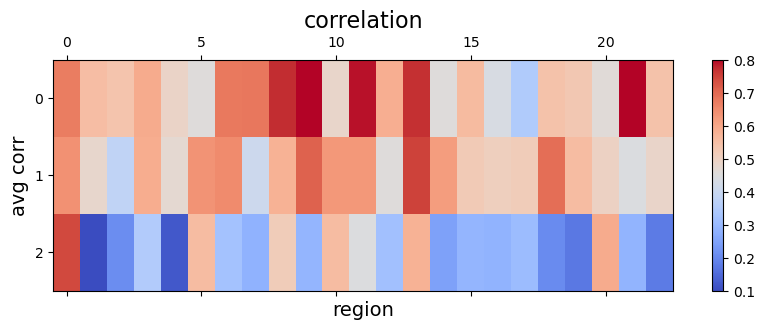

pvalues: [3.211491277343825e-12, 9.421335385981293e-11, 1.0709232382508065e-12, 9.798491849845184e-10, 2.2396541384822966e-10, 1.0709232382508065e-12, 1.43887438958476e-10, 1.0709232382508065e-12, 6.481572656599205e-10, 1.0709232382508065e-12, 4.6752080082468317e-07, 1.0709232382508065e-12, 1.0709232382508065e-12, 4.8220167757825546e-11, 1.0709232382508065e-12, 5.922100054787729e-11, 1.0709232382508065e-12, 4.5931929761597506e-10, 1.0709232382508065e-12, 2.4947253757857393e-11, 1.5907339955941806e-09, 1.0709232382508065e-12, 1.0709232382508065e-12]


In [35]:
region_avg_all_fla = np.array(region_avg_all).flatten()
vmin, vmax = min(region_avg_all_fla), max(region_avg_all_fla)
region_avg_all_norm = []
for corr_matrix in region_avg_all:
    mat = [normalization_given_minmax(i, vmin, vmax) for i in corr_matrix]
    region_avg_all_norm.append(mat)

region_avg_all_norm = [region_avg_all_norm[2], region_avg_all_norm[0], region_avg_all_norm[1]]
figure = plt.figure(figsize=(10,3)) 
axes = figure.add_subplot(111) 
caxes = axes.matshow(region_avg_all_norm, interpolation ='nearest', cmap = "coolwarm", aspect = 'auto',vmin = 0.1, vmax = 0.8) 
plt.title("correlation", fontsize = 16)
plt.xlabel("region", fontsize = 14)
plt.ylabel("avg corr", fontsize = 14)
figure.colorbar(caxes) 
plt.savefig(path_local + "motion_calc_corr_region_avg_all_flies.png", bbox_inches='tight')
plt.savefig(path_local + "motion_calc_corr_region_avg_all_flies.pdf", bbox_inches='tight')
plt.show() 


## test
region_list_ach = np.array(region_list_all[0])
region_list_5ht = np.array(region_list_all[1])
region_list_g7f = np.array(region_list_all[2])
pvalues = []
for i in range(len(region_list_ach[0])):
    value, p = kruskal(region_list_ach[:,i], region_list_5ht[:,i], region_list_g7f[:,i])
    pvalues.append(p)
print("pvalues:", pvalues)
